In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Floor 2 data
floor2_data = pd.read_csv('../data/cu-bem/2019Floor2.csv/2019Floor2.csv')

print("Floor 2 Data Shape:", floor2_data.shape)
print("\nData Info:")
print(floor2_data.info())
print("\nFirst 5 rows:")
floor2_data.head()


Floor 2 Data Shape: (525600, 37)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          525600 non-null  object 
 1   z1_AC1(kW)    495832 non-null  float64
 2   z1_Light(kW)  524967 non-null  float64
 3   z1_Plug(kW)   524964 non-null  float64
 4   z1_S1(degC)   413992 non-null  float64
 5   z1_S1(RH%)    413992 non-null  float64
 6   z1_S1(lux)    413992 non-null  float64
 7   z2_AC1(kW)    495710 non-null  float64
 8   z2_AC2(kW)    523441 non-null  float64
 9   z2_AC3(kW)    523441 non-null  float64
 10  z2_AC4(kW)    523441 non-null  float64
 11  z2_AC5(kW)    524949 non-null  float64
 12  z2_AC6(kW)    524949 non-null  float64
 13  z2_AC7(kW)    524949 non-null  float64
 14  z2_AC8(kW)    524949 non-null  float64
 15  z2_AC9(kW)    524949 non-null  float64
 16  z2_AC10(kW)   524949 non-null  float64
 17  z2_

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
0,2019-01-01 00:00:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.15,0.85,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
1,2019-01-01 00:01:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.84,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,2019-01-01 00:02:00,0.0,0.31,0.09,NaN,NaN,NaN,0.00,1.14,0.83,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,2019-01-01 00:03:00,0.0,0.31,0.09,NaN,NaN,NaN,0.85,1.15,0.84,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,2019-01-01 00:04:00,0.0,0.31,0.09,NaN,NaN,NaN,0.94,1.17,0.87,...,0.23,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [2]:
# Check for duplicates
print("Total number of rows:", len(floor2_data))
print("Number of duplicate rows:", floor2_data.duplicated().sum())
print("Percentage of duplicates:", (floor2_data.duplicated().sum() / len(floor2_data)) * 100, "%")

if floor2_data.duplicated().sum() > 0:
    print("\nDuplicate rows found:")
    duplicate_rows = floor2_data[floor2_data.duplicated()]
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")


Total number of rows: 525600
Number of duplicate rows: 0
Percentage of duplicates: 0.0 %

No duplicate rows found.


In [3]:
# Find columns with missing data
missing_data = floor2_data.isnull().sum()
missing_percentage = (missing_data / len(floor2_data)) * 100

# Create a summary of missing data
missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
})

# Sort by missing percentage in descending order
missing_summary = missing_summary.sort_values('Missing_Percentage', ascending=False)

print("Missing Data Summary:")
print("=" * 50)
print(missing_summary[missing_summary['Missing_Count'] > 0])

print(f"\nTotal columns: {len(floor2_data.columns)}")
print(f"Columns with missing data: {len(missing_summary[missing_summary['Missing_Count'] > 0])}")
print(f"Columns with no missing data: {len(missing_summary[missing_summary['Missing_Count'] == 0])}")


Missing Data Summary:
          Column  Missing_Count  Missing_Percentage
4    z1_S1(degC)         111608           21.234399
6     z1_S1(lux)         111608           21.234399
5     z1_S1(RH%)         111608           21.234399
36    z4_S1(lux)         103288           19.651446
34   z4_S1(degC)         103285           19.650875
35    z4_S1(RH%)         103283           19.650495
30    z3_S1(lux)         102414           19.485160
28   z3_S1(degC)         102411           19.484589
29    z3_S1(RH%)         102410           19.484399
23   z2_S1(degC)          97021           18.459094
25    z2_S1(lux)          97020           18.458904
24    z2_S1(RH%)          97018           18.458524
7     z2_AC1(kW)          29890            5.686834
31    z4_AC1(kW)          29772            5.664384
1     z1_AC1(kW)          29768            5.663623
9     z2_AC3(kW)           2159            0.410769
10    z2_AC4(kW)           2159            0.410769
32  z4_Light(kW)           2159           

In [4]:
# Remove columns with more than 80% missing data
threshold = 80
columns_to_drop = missing_summary[missing_summary['Missing_Percentage'] > threshold]['Column'].tolist()

print(f"Columns with more than {threshold}% missing data:")
print("=" * 50)
for col in columns_to_drop:
    percentage = missing_summary[missing_summary['Column'] == col]['Missing_Percentage'].iloc[0]
    print(f"{col}: {percentage:.2f}%")

print(f"\nNumber of columns to drop: {len(columns_to_drop)}")

# Drop the columns
floor2_data_cleaned = floor2_data.drop(columns=columns_to_drop)

print(f"\nOriginal shape: {floor2_data.shape}")
print(f"After dropping columns: {floor2_data_cleaned.shape}")
print(f"Columns dropped: {len(columns_to_drop)}")
print(f"Columns remaining: {len(floor2_data_cleaned.columns)}")


Columns with more than 80% missing data:

Number of columns to drop: 0

Original shape: (525600, 37)
After dropping columns: (525600, 37)
Columns dropped: 0
Columns remaining: 37


In [5]:
# Fill remaining missing data with mode
print("Missing data before filling:")
print("=" * 30)
remaining_missing = floor2_data_cleaned.isnull().sum()
remaining_missing_summary = remaining_missing[remaining_missing > 0]
print(remaining_missing_summary)

# Fill missing values with mode for each column
floor2_data_final = floor2_data_cleaned.copy()

for column in floor2_data_final.columns:
    if floor2_data_final[column].isnull().sum() > 0:
        mode_value = floor2_data_final[column].mode()
        if len(mode_value) > 0:
            floor2_data_final[column].fillna(mode_value[0], inplace=True)
            print(f"Filled {column} with mode: {mode_value[0]}")
        else:
            # If no mode exists (all values are unique), fill with the first non-null value
            first_value = floor2_data_final[column].dropna().iloc[0] if len(floor2_data_final[column].dropna()) > 0 else 0
            floor2_data_final[column].fillna(first_value, inplace=True)
            print(f"Filled {column} with first available value: {first_value}")

print("\nMissing data after filling:")
print("=" * 30)
final_missing = floor2_data_final.isnull().sum()
print(f"Total missing values: {final_missing.sum()}")
print(f"Shape of final dataset: {floor2_data_final.shape}")

# Verify no missing data remains
if final_missing.sum() == 0:
    print("\nAll missing data has been successfully filled!")
else:
    print(f"\nStill {final_missing.sum()} missing values remaining")


Missing data before filling:
z1_AC1(kW)       29768
z1_Light(kW)       633
z1_Plug(kW)        636
z1_S1(degC)     111608
z1_S1(RH%)      111608
z1_S1(lux)      111608
z2_AC1(kW)       29890
z2_AC2(kW)        2159
z2_AC3(kW)        2159
z2_AC4(kW)        2159
z2_AC5(kW)         651
z2_AC6(kW)         651
z2_AC7(kW)         651
z2_AC8(kW)         651
z2_AC9(kW)         651
z2_AC10(kW)        651
z2_AC11(kW)        651
z2_AC12(kW)        651
z2_AC13(kW)        651
z2_AC14(kW)        651
z2_Light(kW)       736
z2_Plug(kW)        783
z2_S1(degC)      97021
z2_S1(RH%)       97018
z2_S1(lux)       97020
z3_Light(kW)       634
z3_Plug(kW)        633
z3_S1(degC)     102411
z3_S1(RH%)      102410
z3_S1(lux)      102414
z4_AC1(kW)       29772
z4_Light(kW)      2159
z4_Plug(kW)        783
z4_S1(degC)     103285
z4_S1(RH%)      103283
z4_S1(lux)      103288
dtype: int64
Filled z1_AC1(kW) with mode: 0.0
Filled z1_Light(kW) with mode: 0.01
Filled z1_Plug(kW) with mode: 0.25
Filled z1_S1(degC) with mo

C:\Users\anour\AppData\Local\Temp\ipykernel_11452\3721349566.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  floor2_data_final[column].fillna(mode_value[0], inplace=True)


Filled z2_AC4(kW) with mode: 0.0
Filled z2_AC5(kW) with mode: 0.0
Filled z2_AC6(kW) with mode: 0.01
Filled z2_AC7(kW) with mode: 0.0
Filled z2_AC8(kW) with mode: 0.0
Filled z2_AC9(kW) with mode: 0.0
Filled z2_AC10(kW) with mode: 0.0
Filled z2_AC11(kW) with mode: 0.0
Filled z2_AC12(kW) with mode: 0.0
Filled z2_AC13(kW) with mode: 0.0
Filled z2_AC14(kW) with mode: 0.0
Filled z2_Light(kW) with mode: 0.0
Filled z2_Plug(kW) with mode: 0.06
Filled z2_S1(degC) with mode: 26.1
Filled z2_S1(RH%) with mode: 63.8
Filled z2_S1(lux) with mode: 0.0
Filled z3_Light(kW) with mode: 0.19
Filled z3_Plug(kW) with mode: 0.24
Filled z3_S1(degC) with mode: 27.7
Filled z3_S1(RH%) with mode: 71.5
Filled z3_S1(lux) with mode: 0.0
Filled z4_AC1(kW) with mode: 0.0
Filled z4_Light(kW) with mode: 0.0
Filled z4_Plug(kW) with mode: 0.03
Filled z4_S1(degC) with mode: 24.9
Filled z4_S1(RH%) with mode: 73.1
Filled z4_S1(lux) with mode: 0.0

Missing data after filling:
Total missing values: 0
Shape of final dataset: (525

In [6]:
# Statistical Summary of Each Column
print("Statistical Summary for Each Column:")
print("=" * 60)

# Basic statistics for all columns
print("\nBasic Statistics:")
print("-" * 30)
print(floor2_data_final.describe())

# Detailed statistics for each column
print(f"\nDetailed Column Statistics:")
print("=" * 60)

for col in floor2_data_final.columns:
    print(f"\nColumn: {col}")
    print("-" * 40)
    print(f"Data type: {floor2_data_final[col].dtype}")
    print(f"Count: {floor2_data_final[col].count()}")
    print(f"Unique values: {floor2_data_final[col].nunique()}")
    
    if floor2_data_final[col].dtype in ['int64', 'float64']:
        print(f"Mean: {floor2_data_final[col].mean():.4f}")
        print(f"Std: {floor2_data_final[col].std():.4f}")
        print(f"Min: {floor2_data_final[col].min():.4f}")
        print(f"Max: {floor2_data_final[col].max():.4f}")
        print(f"Median: {floor2_data_final[col].median():.4f}")
        print(f"25th percentile: {floor2_data_final[col].quantile(0.25):.4f}")
        print(f"75th percentile: {floor2_data_final[col].quantile(0.75):.4f}")
    else:
        print(f"Most frequent value: {floor2_data_final[col].mode().iloc[0] if len(floor2_data_final[col].mode()) > 0 else 'N/A'}")
        print(f"Value counts (top 5):")
        print(floor2_data_final[col].value_counts().head())
    
    print(f"Missing values: {floor2_data_final[col].isnull().sum()}")
    print(f"Missing percentage: {(floor2_data_final[col].isnull().sum() / len(floor2_data_final)) * 100:.2f}%")


Statistical Summary for Each Column:

Basic Statistics:
------------------------------
          z1_AC1(kW)   z1_Light(kW)    z1_Plug(kW)    z1_S1(degC)  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        8.110839       2.563964       1.115877      24.520328   
std        13.771074       3.444865       1.283805       2.475676   
min         0.000000       0.000000       0.000000      17.560000   
25%         0.000000       0.010000       0.250000      23.430000   
50%         0.000000       0.010000       0.360000      25.100000   
75%        19.650000       6.810000       2.280000      25.900000   
max        54.510000      22.380000       9.820000      31.900000   

          z1_S1(RH%)     z1_S1(lux)     z2_AC1(kW)     z2_AC2(kW)  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       63.172126      21.619159       6.330497       0.608882   
std         4.479764      33.069846      10.452017       0.527011   
min        45.5

In [7]:
# Time Series Analysis and Processing
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# First, let's examine the data structure to identify time-related columns
print("Column names and data types:")
print("=" * 40)
for col in floor2_data_final.columns:
    print(f"{col}: {floor2_data_final[col].dtype}")

print(f"\nFirst few values of each column:")
print("=" * 40)
for col in floor2_data_final.columns[:10]:  # Show first 10 columns
    print(f"{col}: {floor2_data_final[col].head(3).tolist()}")


Column names and data types:
Date: object
z1_AC1(kW): float64
z1_Light(kW): float64
z1_Plug(kW): float64
z1_S1(degC): float64
z1_S1(RH%): float64
z1_S1(lux): float64
z2_AC1(kW): float64
z2_AC2(kW): float64
z2_AC3(kW): float64
z2_AC4(kW): float64
z2_AC5(kW): float64
z2_AC6(kW): float64
z2_AC7(kW): float64
z2_AC8(kW): float64
z2_AC9(kW): float64
z2_AC10(kW): float64
z2_AC11(kW): float64
z2_AC12(kW): float64
z2_AC13(kW): float64
z2_AC14(kW): float64
z2_Light(kW): float64
z2_Plug(kW): float64
z2_S1(degC): float64
z2_S1(RH%): float64
z2_S1(lux): float64
z3_Light(kW): float64
z3_Plug(kW): float64
z3_S1(degC): float64
z3_S1(RH%): float64
z3_S1(lux): float64
z4_AC1(kW): float64
z4_Light(kW): float64
z4_Plug(kW): float64
z4_S1(degC): float64
z4_S1(RH%): float64
z4_S1(lux): float64

First few values of each column:
Date: ['2019-01-01 00:00:00', '2019-01-01 00:01:00', '2019-01-01 00:02:00']
z1_AC1(kW): [0.0, 0.0, 0.0]
z1_Light(kW): [0.31, 0.31, 0.31]
z1_Plug(kW): [0.09, 0.09, 0.09]
z1_S1(degC): [

In [8]:
# Convert to time series format
# Assuming there's a timestamp or datetime column - let's find it
time_columns = []
for col in floor2_data_final.columns:
    col_lower = col.lower()
    if any(keyword in col_lower for keyword in ['time', 'date', 'timestamp', 'datetime', 'hour', 'day', 'month', 'year']):
        time_columns.append(col)

print("Potential time-related columns:")
print("=" * 40)
for col in time_columns:
    print(f"{col}: {floor2_data_final[col].head(3).tolist()}")

# If we find time columns, let's process them
if time_columns:
    # Use the first time column found
    time_col = time_columns[0]
    print(f"\nUsing '{time_col}' as the time column")
    
    # Convert to datetime
    try:
        floor2_data_final[time_col] = pd.to_datetime(floor2_data_final[time_col])
        print(f"Successfully converted {time_col} to datetime")
        
        # Set as index
        floor2_data_ts = floor2_data_final.set_index(time_col)
        print(f"Set {time_col} as index")
        print(f"Time range: {floor2_data_ts.index.min()} to {floor2_data_ts.index.max()}")
        
    except Exception as e:
        print(f"Error converting {time_col} to datetime: {e}")
        floor2_data_ts = floor2_data_final.copy()
else:
    print("No obvious time columns found. Creating a sequential index.")
    floor2_data_ts = floor2_data_final.copy()
    floor2_data_ts.index = pd.date_range(start='2019-01-01', periods=len(floor2_data_ts), freq='H')
    print(f"Created hourly time index from 2019-01-01")


Potential time-related columns:
Date: ['2019-01-01 00:00:00', '2019-01-01 00:01:00', '2019-01-01 00:02:00']

Using 'Date' as the time column
Successfully converted Date to datetime
Set Date as index
Time range: 2019-01-01 00:00:00 to 2019-12-31 23:59:00


In [9]:
# Time Series Operations
print("Time Series Dataset Info:")
print("=" * 40)
print(f"Shape: {floor2_data_ts.shape}")
print(f"Index type: {type(floor2_data_ts.index)}")
print(f"Frequency: {floor2_data_ts.index.freq if hasattr(floor2_data_ts.index, 'freq') else 'Not specified'}")

# Basic time series statistics
print(f"\nTime Series Statistics:")
print("=" * 40)
print(f"Start time: {floor2_data_ts.index.min()}")
print(f"End time: {floor2_data_ts.index.max()}")
print(f"Duration: {floor2_data_ts.index.max() - floor2_data_ts.index.min()}")
print(f"Total observations: {len(floor2_data_ts)}")

# Check for missing time periods
print(f"\nMissing Time Periods Check:")
print("=" * 40)
if hasattr(floor2_data_ts.index, 'freq') and floor2_data_ts.index.freq:
    expected_range = pd.date_range(start=floor2_data_ts.index.min(), 
                                  end=floor2_data_ts.index.max(), 
                                  freq=floor2_data_ts.index.freq)
    missing_periods = expected_range.difference(floor2_data_ts.index)
    print(f"Expected observations: {len(expected_range)}")
    print(f"Actual observations: {len(floor2_data_ts)}")
    print(f"Missing periods: {len(missing_periods)}")
    if len(missing_periods) > 0:
        print(f"First few missing periods: {missing_periods[:5].tolist()}")
else:
    print("Cannot check for missing periods - frequency not specified")


Time Series Dataset Info:
Shape: (525600, 36)
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Frequency: None

Time Series Statistics:
Start time: 2019-01-01 00:00:00
End time: 2019-12-31 23:59:00
Duration: 364 days 23:59:00
Total observations: 525600

Missing Time Periods Check:
Cannot check for missing periods - frequency not specified


In [10]:
# Advanced Time Series Operations
print("Advanced Time Series Operations:")
print("=" * 50)

# Select numeric columns for time series analysis
numeric_columns = floor2_data_ts.select_dtypes(include=[np.number]).columns
print(f"Numeric columns available for analysis: {len(numeric_columns)}")
print(f"Columns: {list(numeric_columns)}")

if len(numeric_columns) > 0:
    # Resampling operations (daily, weekly, monthly)
    print(f"\nResampling Operations:")
    print("-" * 30)
    
    # Daily resampling
    daily_data = floor2_data_ts[numeric_columns].resample('D').mean()
    print(f"Daily resampling shape: {daily_data.shape}")
    
    # Weekly resampling
    weekly_data = floor2_data_ts[numeric_columns].resample('W').mean()
    print(f"Weekly resampling shape: {weekly_data.shape}")
    
    # Monthly resampling
    monthly_data = floor2_data_ts[numeric_columns].resample('M').mean()
    print(f"Monthly resampling shape: {monthly_data.shape}")
    
    # Rolling statistics
    print(f"\nRolling Statistics (24-hour window):")
    print("-" * 40)
    rolling_24h = floor2_data_ts[numeric_columns].rolling(window=24, min_periods=1)
    
    rolling_stats = pd.DataFrame({
        'Mean': rolling_24h.mean().mean(),
        'Std': rolling_24h.std().mean(),
        'Min': rolling_24h.min().mean(),
        'Max': rolling_24h.max().mean()
    })
    print(rolling_stats)
    
    # Time-based aggregations
    print(f"\nTime-based Aggregations:")
    print("-" * 30)
    
    # Hour of day patterns
    floor2_data_ts['hour'] = floor2_data_ts.index.hour
    hourly_patterns = floor2_data_ts.groupby('hour')[numeric_columns].mean()
    print(f"Hourly patterns shape: {hourly_patterns.shape}")
    
    # Day of week patterns
    floor2_data_ts['dayofweek'] = floor2_data_ts.index.dayofweek
    daily_patterns = floor2_data_ts.groupby('dayofweek')[numeric_columns].mean()
    print(f"Daily patterns shape: {daily_patterns.shape}")
    
    print(f"\nTime series processing completed successfully!")
    print(f"Final dataset shape: {floor2_data_ts.shape}")
    
else:
    print("No numeric columns found for time series analysis")


Advanced Time Series Operations:
Numeric columns available for analysis: 36
Columns: ['z1_AC1(kW)', 'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)', 'z1_S1(lux)', 'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)', 'z2_AC4(kW)', 'z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)', 'z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)', 'z2_AC13(kW)', 'z2_AC14(kW)', 'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)', 'z3_Light(kW)', 'z3_Plug(kW)', 'z3_S1(degC)', 'z3_S1(RH%)', 'z3_S1(lux)', 'z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)', 'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)']

Resampling Operations:
------------------------------
Daily resampling shape: (365, 36)
Weekly resampling shape: (53, 36)
Monthly resampling shape: (12, 36)

Rolling Statistics (24-hour window):
----------------------------------------
                   Mean       Std        Min        Max
z1_AC1(kW)     8.110839  1.665012   6.134606  10.600136
z1_Light(kW)   2.563971  0.106054   2.37

In [11]:
# Outlier Detection Analysis
from scipy import stats

print("Outlier Detection Analysis:")
print("=" * 50)

# Select numeric columns for outlier analysis
numeric_cols = floor2_data_final.select_dtypes(include=[np.number]).columns
print(f"Numeric columns for outlier analysis: {len(numeric_cols)}")
print(f"Columns: {list(numeric_cols)}")

if len(numeric_cols) > 0:
    # Z-Score Analysis
    print(f"\nZ-Score Outlier Detection:")
    print("-" * 40)
    
    # Calculate z-scores for all numeric columns
    z_scores_df = pd.DataFrame(
        np.abs(stats.zscore(floor2_data_final[numeric_cols])),
        columns=numeric_cols,
        index=floor2_data_final.index
    )
    
    # Define outlier threshold (typically 2 or 3)
    outlier_threshold = 3
    outliers_summary = {}
    
    for col in numeric_cols:
        outlier_mask = z_scores_df[col] > outlier_threshold
        outlier_count = outlier_mask.sum()
        outlier_percentage = (outlier_count / len(floor2_data_final)) * 100
        
        outliers_summary[col] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'max_z_score': z_scores_df[col].max()
        }
        
        print(f"{col}:")
        print(f"  Outliers (z-score > {outlier_threshold}): {outlier_count} ({outlier_percentage:.2f}%)")
        print(f"  Max z-score: {z_scores_df[col].max():.2f}")
    
    # Summary statistics
    total_outliers = sum([info['count'] for info in outliers_summary.values()])
    print(f"\nTotal outliers across all columns: {total_outliers}")
    
else:
    print("No numeric columns found for outlier analysis")


Outlier Detection Analysis:
Numeric columns for outlier analysis: 36
Columns: ['z1_AC1(kW)', 'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)', 'z1_S1(lux)', 'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)', 'z2_AC4(kW)', 'z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)', 'z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)', 'z2_AC13(kW)', 'z2_AC14(kW)', 'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)', 'z3_Light(kW)', 'z3_Plug(kW)', 'z3_S1(degC)', 'z3_S1(RH%)', 'z3_S1(lux)', 'z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)', 'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)']

Z-Score Outlier Detection:
----------------------------------------
z1_AC1(kW):
  Outliers (z-score > 3): 5 (0.00%)
  Max z-score: 3.37
z1_Light(kW):
  Outliers (z-score > 3): 6 (0.00%)
  Max z-score: 5.75
z1_Plug(kW):
  Outliers (z-score > 3): 7 (0.00%)
  Max z-score: 6.78
z1_S1(degC):
  Outliers (z-score > 3): 0 (0.00%)
  Max z-score: 2.98
z1_S1(RH%):
  Outliers (z-score > 3): 1345 (0.26%)


Creating Outlier Visualizations:


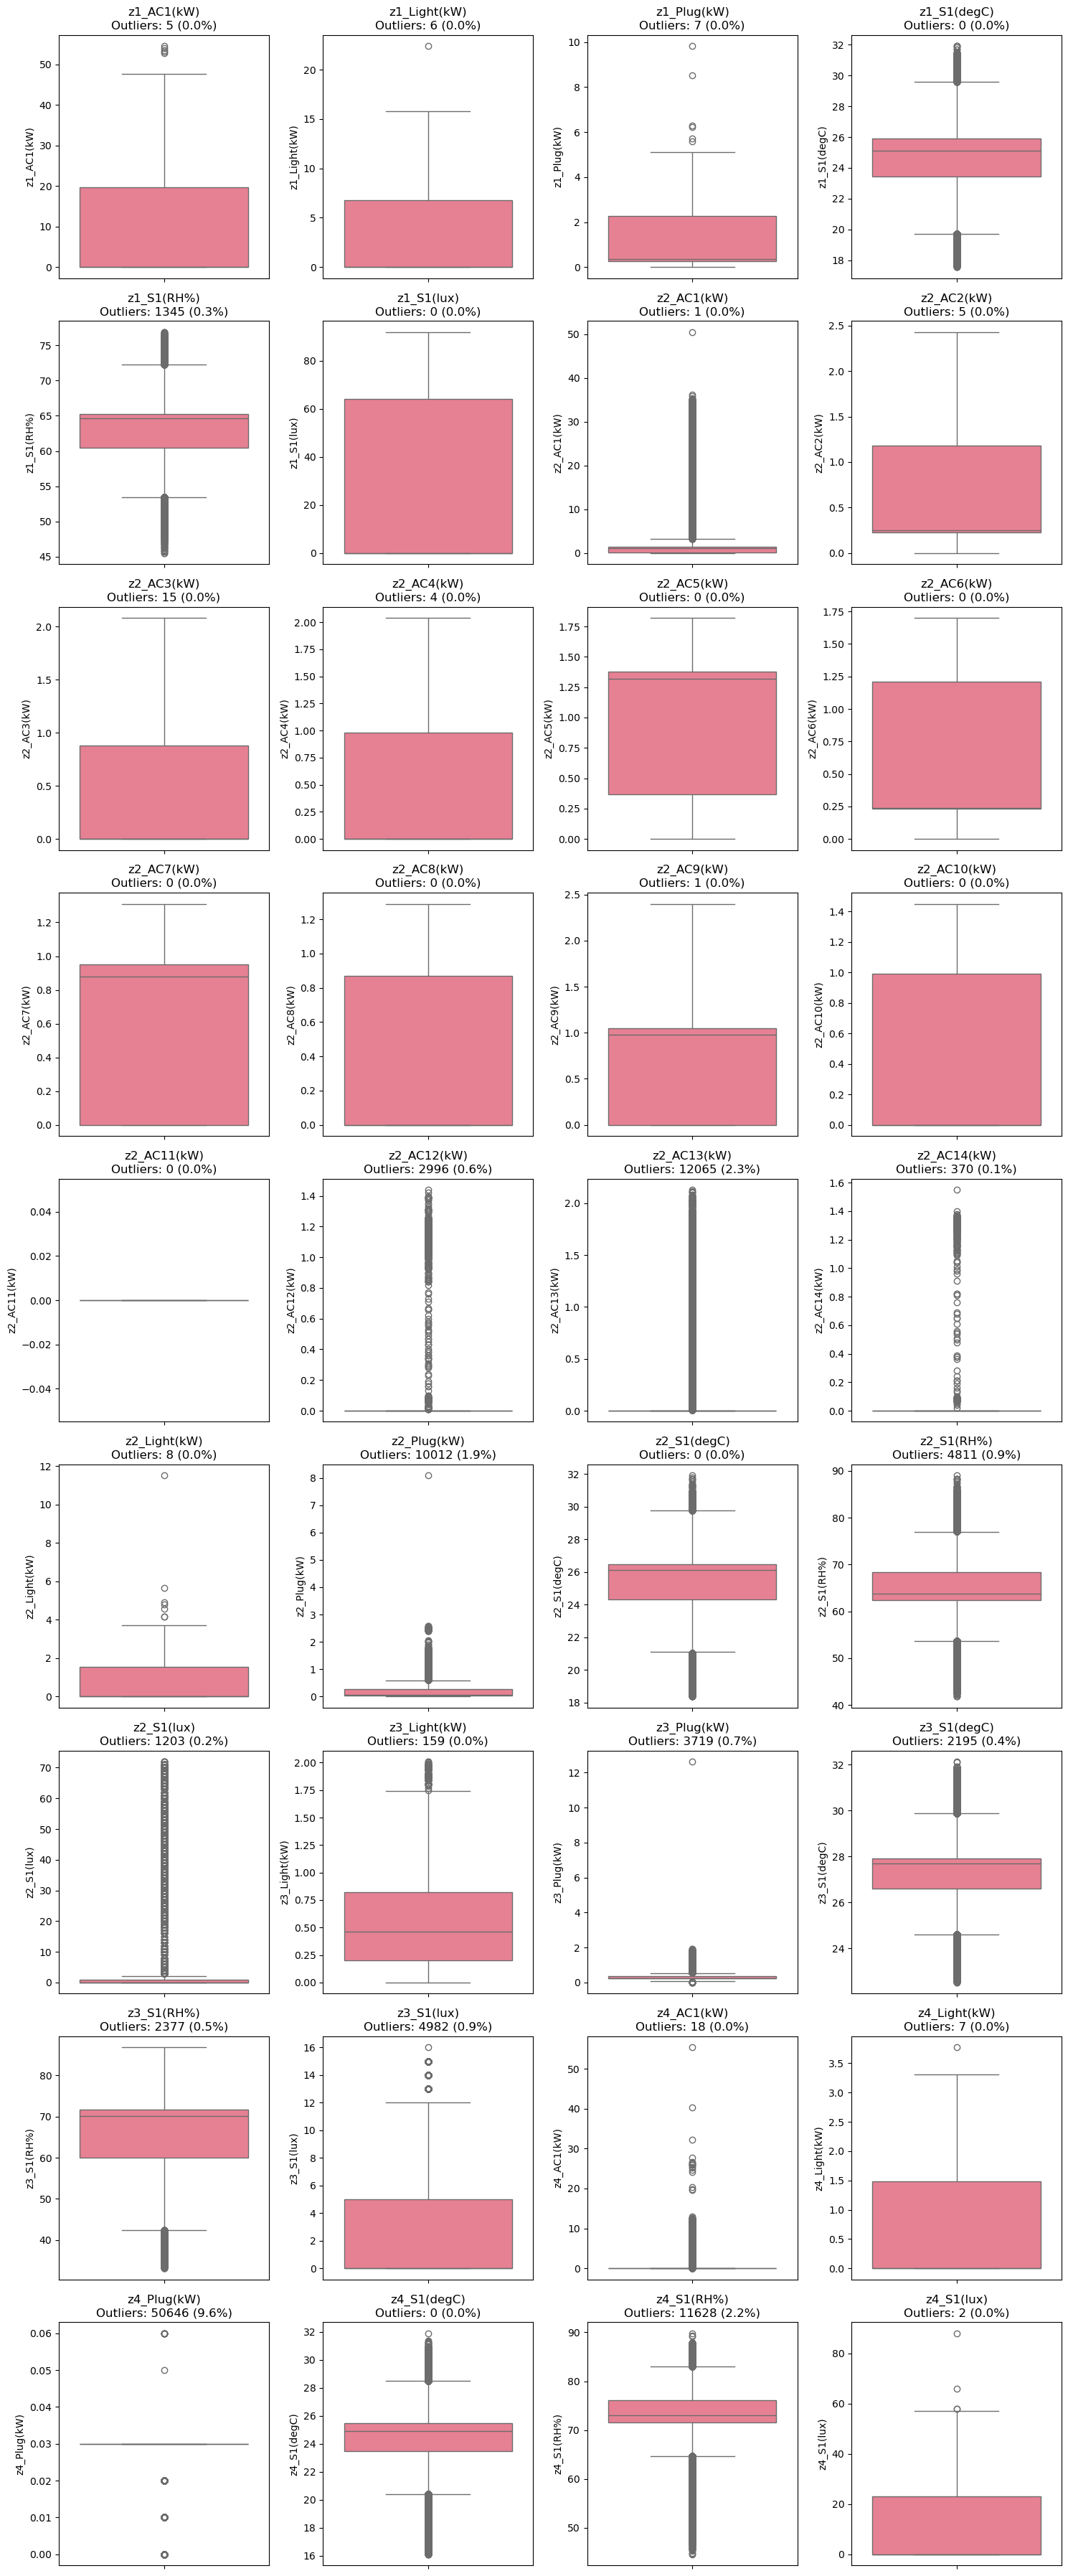


Distribution Plots for Columns with Outliers:
--------------------------------------------------


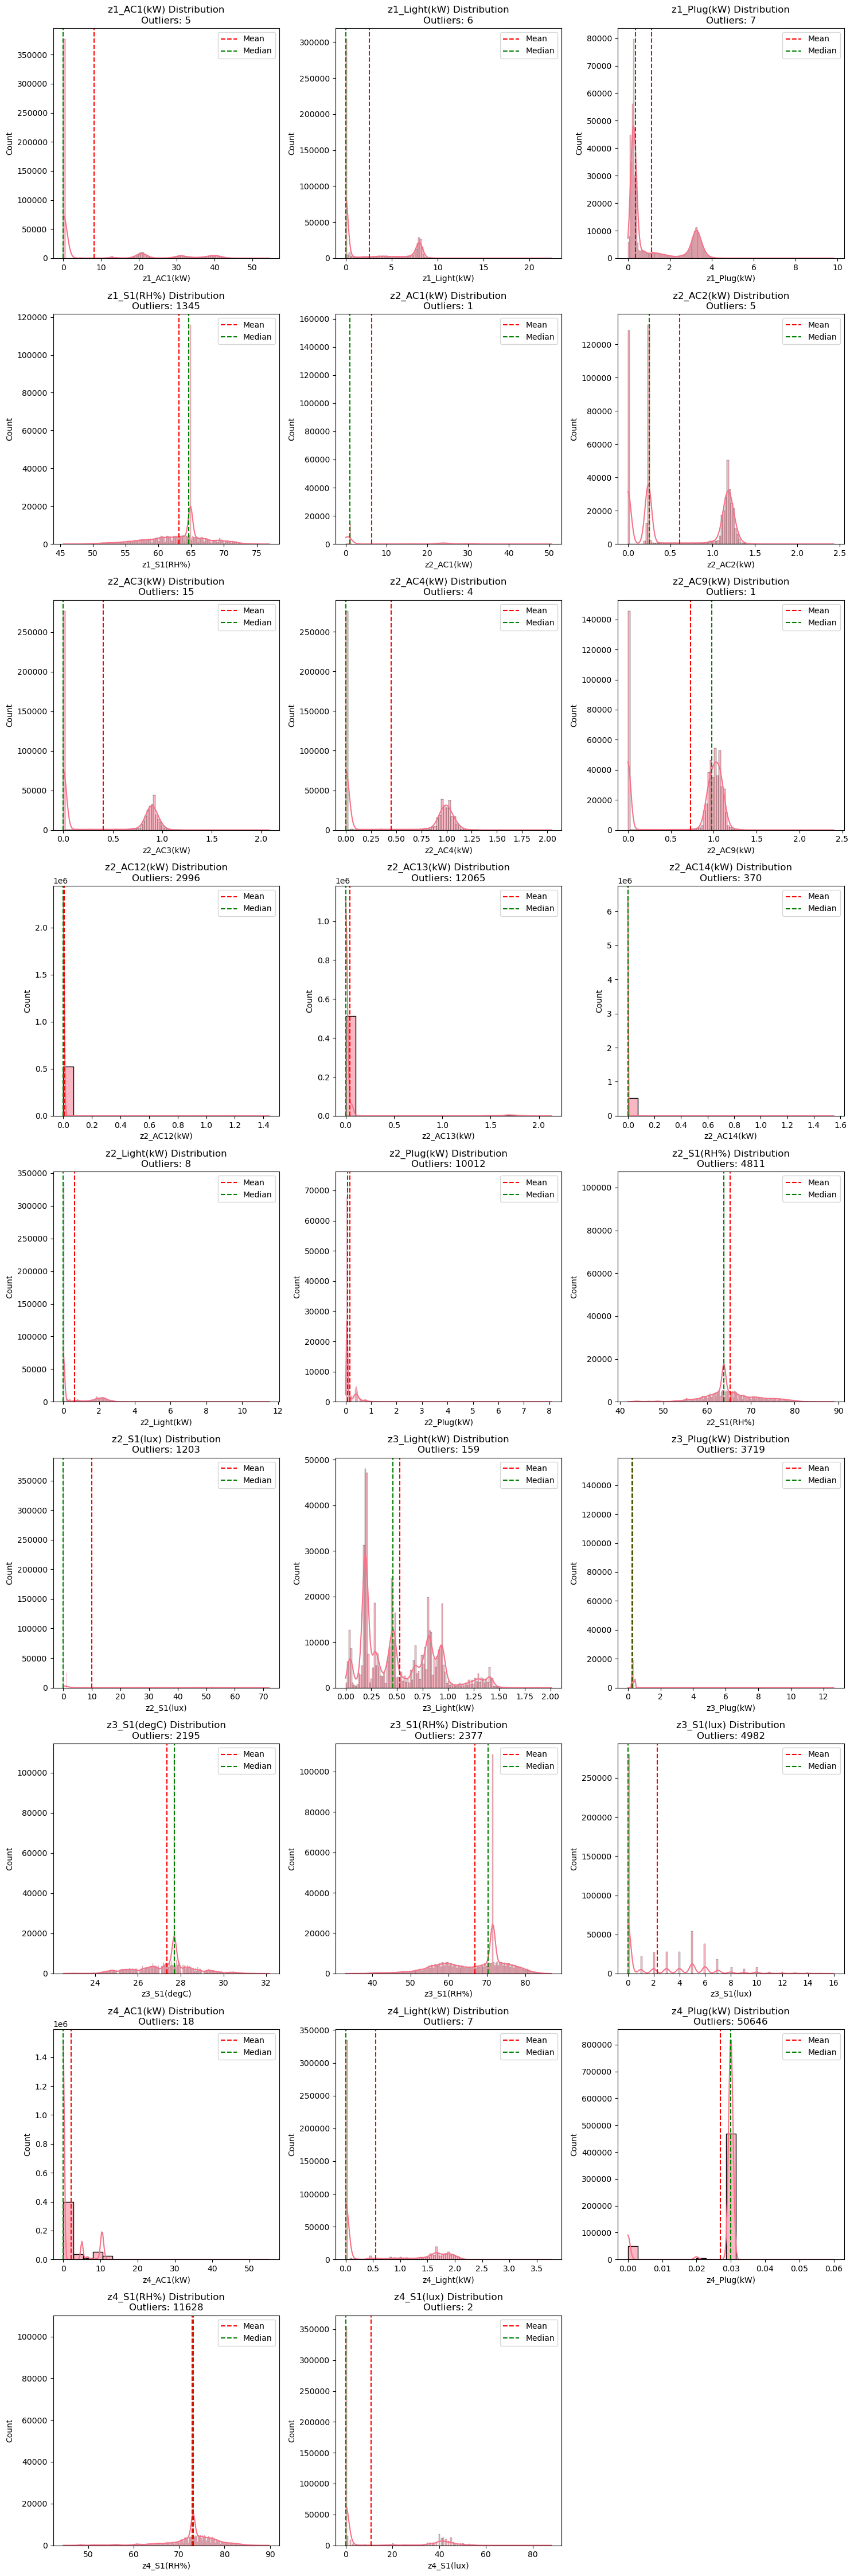


Outlier detection and visualization completed!


In [12]:
# Outlier Visualization
if len(numeric_cols) > 0:
    print("Creating Outlier Visualizations:")
    print("=" * 40)
    
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create subplots for box plots
    n_cols = min(4, len(numeric_cols))  # Show max 4 columns per row
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Create box plots for each numeric column
    for i, col in enumerate(numeric_cols):
        row = i // n_cols
        col_idx = i % n_cols
        
        if n_rows > 1:
            ax = axes[row, col_idx]
        else:
            ax = axes[col_idx]
        
        # Create box plot
        sns.boxplot(data=floor2_data_final, y=col, ax=ax)
        ax.set_title(f'{col}\nOutliers: {outliers_summary[col]["count"]} ({outliers_summary[col]["percentage"]:.1f}%)')
        ax.tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for i in range(len(numeric_cols), n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        if n_rows > 1:
            axes[row, col_idx].set_visible(False)
        else:
            axes[col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Create distribution plots for columns with outliers
    print(f"\nDistribution Plots for Columns with Outliers:")
    print("-" * 50)
    
    columns_with_outliers = [col for col in numeric_cols if outliers_summary[col]['count'] > 0]
    
    if len(columns_with_outliers) > 0:
        n_dist_cols = min(3, len(columns_with_outliers))
        n_dist_rows = (len(columns_with_outliers) + n_dist_cols - 1) // n_dist_cols
        
        fig, axes = plt.subplots(n_dist_rows, n_dist_cols, figsize=(15, 5*n_dist_rows))
        if n_dist_rows == 1:
            axes = axes.reshape(1, -1) if n_dist_cols > 1 else [axes]
        
        for i, col in enumerate(columns_with_outliers):
            row = i // n_dist_cols
            col_idx = i % n_dist_cols
            
            if n_dist_rows > 1:
                ax = axes[row, col_idx]
            else:
                ax = axes[col_idx] if n_dist_cols > 1 else axes
            
            # Create histogram with KDE
            sns.histplot(data=floor2_data_final, x=col, kde=True, ax=ax)
            ax.set_title(f'{col} Distribution\nOutliers: {outliers_summary[col]["count"]}')
            ax.axvline(floor2_data_final[col].mean(), color='red', linestyle='--', label='Mean')
            ax.axvline(floor2_data_final[col].median(), color='green', linestyle='--', label='Median')
            ax.legend()
        
        # Hide empty subplots
        for i in range(len(columns_with_outliers), n_dist_rows * n_dist_cols):
            row = i // n_dist_cols
            col_idx = i % n_dist_cols
            if n_dist_rows > 1:
                axes[row, col_idx].set_visible(False)
            else:
                if n_dist_cols > 1:
                    axes[col_idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    else:
        print("No columns with outliers found for distribution plots")
    
    print(f"\nOutlier detection and visualization completed!")
    
else:
    print("No numeric columns available for visualization")


In [13]:
# Outlier Handling with Winsorizing (COMMENTED OUT - NOT APPLIED YET)
# Winsorizing caps extreme values at specified percentiles instead of removing them
# This preserves data structure while reducing outlier impact

# from scipy.stats import mstats
# 
# print("Outlier Handling with Winsorizing:")
# print("=" * 50)
# 
# # Define winsorizing parameters
# lower_percentile = 1  # Cap bottom 1% of values
# upper_percentile = 99  # Cap top 1% of values
# 
# # Create a copy for winsorized data
# floor2_data_winsorized = floor2_data_final.copy()
# 
# print(f"Winsorizing parameters:")
# print(f"  Lower percentile: {lower_percentile}%")
# print(f"  Upper percentile: {upper_percentile}%")
# print(f"  This will cap extreme values at the {lower_percentile}th and {upper_percentile}th percentiles")
# 
# # Apply winsorizing to numeric columns
# numeric_cols = floor2_data_final.select_dtypes(include=[np.number]).columns
# 
# for col in numeric_cols:
#     original_values = floor2_data_final[col].dropna()
#     
#     if len(original_values) > 0:
#         # Calculate percentiles
#         lower_bound = np.percentile(original_values, lower_percentile)
#         upper_bound = np.percentile(original_values, upper_percentile)
#         
#         # Count values that will be capped
#         values_capped_lower = (floor2_data_final[col] < lower_bound).sum()
#         values_capped_upper = (floor2_data_final[col] > upper_bound).sum()
#         total_capped = values_capped_lower + values_capped_upper
#         
#         print(f"\n{col}:")
#         print(f"  Original range: [{floor2_data_final[col].min():.4f}, {floor2_data_final[col].max():.4f}]")
#         print(f"  Winsorized range: [{lower_bound:.4f}, {upper_bound:.4f}]")
#         print(f"  Values capped: {total_capped} ({values_capped_lower} lower, {values_capped_upper} upper)")
#         
#         # Apply winsorizing
#         floor2_data_winsorized[col] = np.clip(floor2_data_final[col], lower_bound, upper_bound)
# 
# print(f"\nWinsorizing completed!")
# print(f"Original dataset shape: {floor2_data_final.shape}")
# print(f"Winsorized dataset shape: {floor2_data_winsorized.shape}")
# 
# # Optional: Compare statistics before and after winsorizing
# print(f"\nComparison of key statistics:")
# print("-" * 40)
# 
# for col in numeric_cols[:5]:  # Show first 5 columns
#     print(f"\n{col}:")
#     print(f"  Original - Mean: {floor2_data_final[col].mean():.4f}, Std: {floor2_data_final[col].std():.4f}")
#     print(f"  Winsorized - Mean: {floor2_data_winsorized[col].mean():.4f}, Std: {floor2_data_winsorized[col].std():.4f}")
# 
